In [1]:
#Import the necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import chi2_contingency

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the dataset
stroke_data=pd.read_csv("stroke_data.csv")

In [3]:
#Let get basic information about the data using .info() and .head()
stroke_data.info()
stroke_data.head(5) #Printing 5 rows of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#Checking if data contains null values
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
#Shape of stroke dataset
print("Shape of the stroke dataset: ",stroke_data.shape)

Shape of the stroke dataset:  (5110, 12)


-Data is composed of 5110 rows and 12 column, with the last column indicated the stroke status of an individual. 

-Columns contain both object and numerical datatypes. 

-Column "bmi" contains 201 null values. 

In [6]:
# Get descriptive statistics of the data
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
#The differences between bmi min and max is too high, so, I am going to delete the rows with missing values
stroke_data.dropna(inplace=True)

In [8]:
#Also delete id column. It has no purpose.
stroke_data.drop("id", axis=1, inplace=True)

In [9]:
stroke_data=stroke_data.reset_index(drop=True)

In [10]:
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [11]:
stroke_data.stroke.value_counts()/(stroke_data.stroke.value_counts().sum())*100

0    95.742514
1     4.257486
Name: stroke, dtype: float64

<AxesSubplot:>

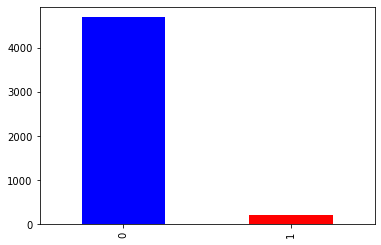

In [12]:
#Lets first understand the target variable
stroke_data.stroke.value_counts().plot.bar(color=["blue","red"])

The population of individuals who had a stroke are substantially lower than individuals who did not get a stroke. The data is imbalanced.

In [13]:
num_columns=["age","avg_glucose_level","bmi"]
stroke_data[num_columns]

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,80.0,105.92,32.5
2,49.0,171.23,34.4
3,79.0,174.12,24.0
4,81.0,186.21,29.0
...,...,...,...
4904,13.0,103.08,18.6
4905,81.0,125.20,40.0
4906,35.0,82.99,30.6
4907,51.0,166.29,25.6


Univeriate Analysis of age, avg_glucose_level, and bmi

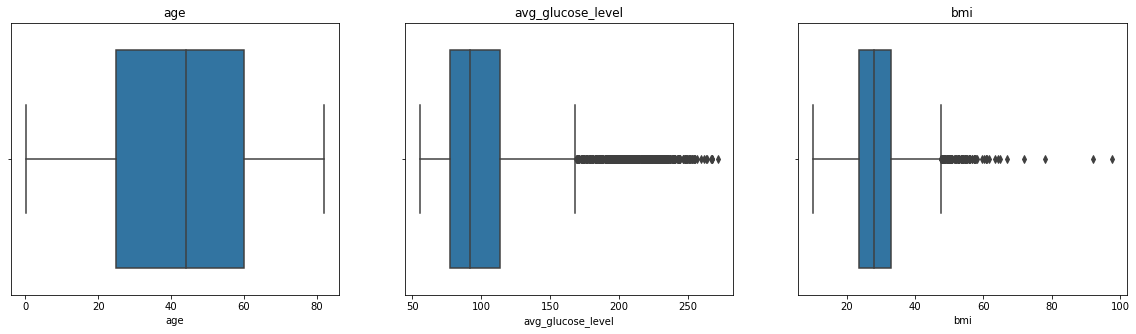

In [14]:
# Lets check for outliers in our numerical columns using boxplots
count=1
plt.figure(figsize=(20,5))
           
for i in num_columns:
    plt.subplot(1,3,count)
    count=count+1
    sns.boxplot(x=i, data=stroke_data)
    plt.title(i)

In [15]:
stroke_data[stroke_data["bmi"]>90]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2019,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
4030,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0


In [16]:
#Delete indexes of bmi over 90
stroke_data = stroke_data.drop(stroke_data.index[[2019,4030]])

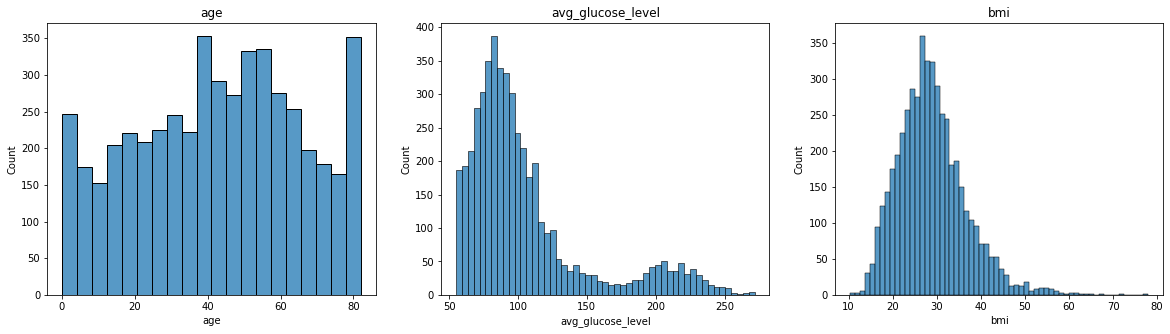

In [17]:
#Check numerical columns distributions
count=1
plt.figure(figsize=(20,5))
for i in num_columns:
    plt.subplot(1,3,count)
    count=count+1
    sns.histplot(x=i, data=stroke_data)
    plt.title(i)

Age is not normally distributed. 
avg_glucose_level and bmi graphs looks skewed.

In [18]:
print("avg_glucose_level skew: ",stroke_data.avg_glucose_level.skew())
print("bmi skew: ",stroke_data.bmi.skew())

avg_glucose_level skew:  1.6139497873463127
bmi skew:  0.8597733959795986


In [19]:
#Lets take log of avg_glucose and bmi
stroke_data['log_glucose']=np.log(stroke_data.avg_glucose_level)
stroke_data['log_bmi']=np.log(stroke_data.bmi)

<AxesSubplot:xlabel='log_bmi', ylabel='Count'>

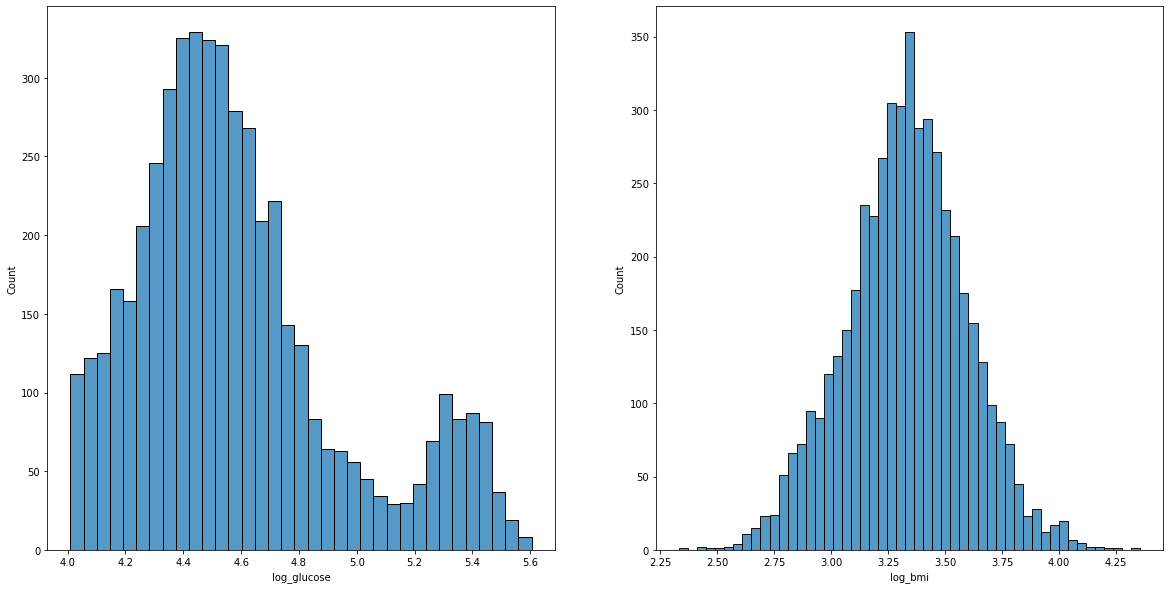

In [20]:
#Check avg_glucose and bmi log distributions
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.histplot(x=stroke_data['log_glucose'], data=stroke_data)
plt.subplot(1,2,2)
sns.histplot(x=stroke_data['log_bmi'], data=stroke_data)

In [21]:
print("avg_glucose_level skew: ",stroke_data.log_glucose.skew())
print("bmi skew: ",stroke_data.log_bmi.skew())

avg_glucose_level skew:  0.8927928285958613
bmi skew:  -0.03380998285826808


Taking log did normalize the bmi but not avg_glucose_level

<AxesSubplot:xlabel='age_bins'>

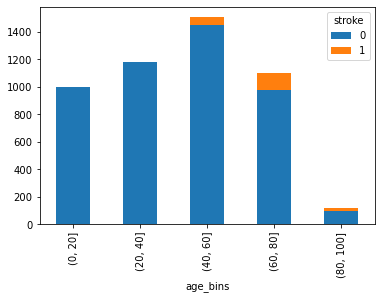

In [22]:
#Analyze Age with Stroke (analyzing age as a categorical variable)

stroke_data['age_bins']=pd.cut(stroke_data.age, bins=[0,20,40,60,80,100])
age=stroke_data.groupby(['age_bins','stroke'])['age'].count().unstack()
age.plot(kind='bar', stacked=True)

Individuals age 40 and above are more likely to have a stroke.

In [23]:
stroke_data.drop('age_bins', axis=1, inplace=True)

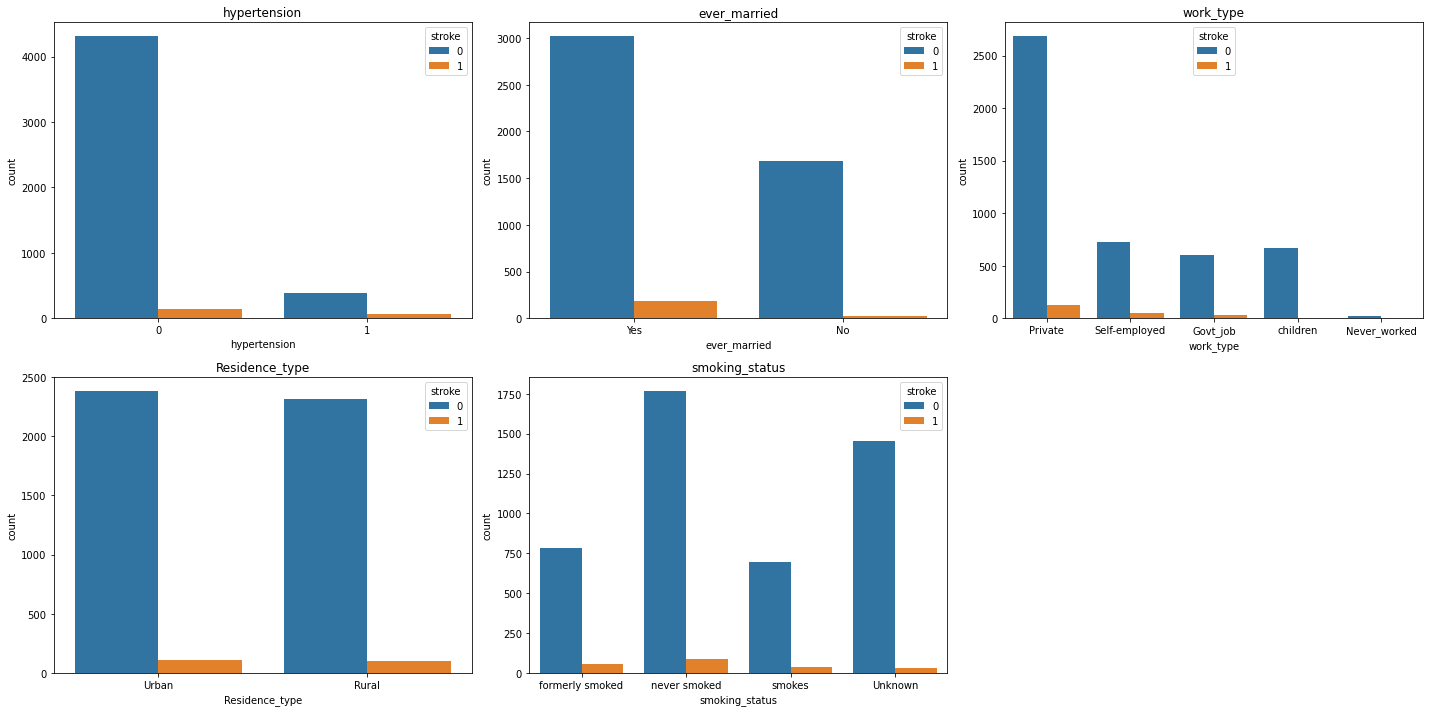

In [24]:
#Analyzing categorical variables with stroke
cat_col=['hypertension','ever_married','work_type','Residence_type','smoking_status']  
plt.figure(figsize=(20,10))
j=1
for i in cat_col:
    plt.subplot(2,3,j)
    j=j+1
    sns.countplot(x=i, hue='stroke', data=stroke_data)
    plt.title(i)
plt.tight_layout()

### Hypothesis 1
    Null: There is no significant differences between glucose level of people having a stroke and not.
    Alternative: People with higher glucose level are likely to have a stroke.

In [25]:
count_num_col=stroke_data.groupby('stroke')['age','avg_glucose_level','bmi',].mean()
count_num_col

,age,avg_glucose_level,bmi
stroke,,,
0,41.766522,104.022774,28.794977
1,67.712919,134.571388,30.471292


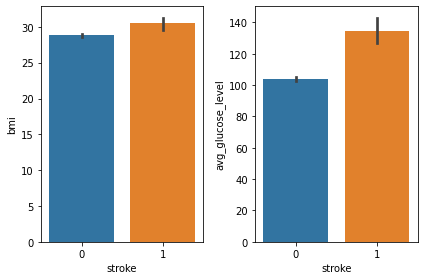

In [26]:
#Bivariate analysis of numerical columns with stroke target
plt.subplot(1,2,1)
sns.barplot(x='stroke', y='bmi', data=stroke_data)
plt.subplot(1,2,2)
sns.barplot(x='stroke', y='avg_glucose_level', data=stroke_data)

plt.tight_layout()

In both catergories, individuals with no stroke have lower bmi and glucose level.

In [27]:
g_0=stroke_data[stroke_data["stroke"]==0]['avg_glucose_level']
g_1=stroke_data[stroke_data["stroke"]==1]['avg_glucose_level']

In [28]:
g_1.mean()

134.5713875598086

In [29]:
#Testing our hypothesis with a t-test. Alpha of 0.05 is used.
stats.ttest_ind(g_0,g_1)

Ttest_indResult(statistic=-9.821633674829336, pvalue=1.4651864675384611e-22)

p-value is less than 0.05. Null hypothesis is rejected, so, people with higher glucose level are likely to have a stroke.

### Hypothesis 2:
    Null: There is no significant difference between which gender is more likely to have a stroke.
    Alternative: There is a significant difference between which gender is more likely to have a stroke.

<AxesSubplot:xlabel='gender', ylabel='count'>

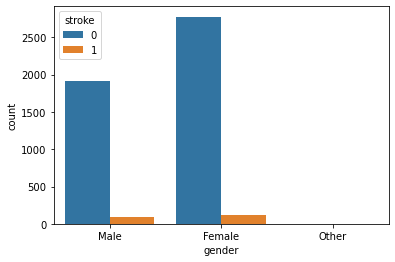

In [30]:
#Lets analyse the gender column with stroke column
sns.countplot(x='gender', hue='stroke', data=stroke_data)

In [31]:
stroke_data.groupby("stroke")["gender"].value_counts()

stroke  gender
0       Female    2777
        Male      1920
        Other        1
1       Female     120
        Male        89
Name: gender, dtype: int64

In both stroke categories, females rank higher. 

In [32]:
contingency=pd.crosstab(stroke_data.gender, stroke_data.stroke)
contingency

stroke,0,1
gender,,
Female,2777,120
Male,1920,89
Other,1,0


In [33]:
#Run the chisquared test
chi2, p_val, dof, exp_freq = chi2_contingency(contingency, correction = False)
chi2, p_val

(0.28554324338200093, 0.8669520393292778)

P-value of 0.86 indicates there is no significant difference between which gender will have a stroke. Null hypothesis is retained.

### Hypothesis 3
    Null: Heart disease does not contribute to stoke.
    Alternative: Heart attack does contribute to a stroke.

In [34]:
# Lest analyze the heart attack colum with stroke column

stroke_data['heart_disease'].value_counts()

0    4664
1     243
Name: heart_disease, dtype: int64

In [35]:
heart_disease=pd.crosstab(stroke_data.heart_disease, stroke_data.stroke)
heart_disease

stroke,0,1
heart_disease,,
0,4495,169
1,203,40


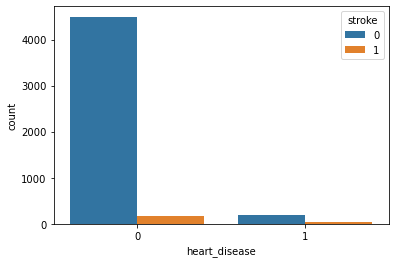

In [36]:
sns.countplot(x='heart_disease', hue='stroke', data=stroke_data)
plt.show()

In [37]:
chi2, pval, dof, exp_freq=chi2_contingency(heart_disease, correction = False)
chi2, pval

(93.3417936344861, 4.400021446645539e-22)

p-value is less than 0.05, indicating that heart disease does contribute to stroke.

### Feature Engineering

In [38]:
#Look at the data again.

stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,log_glucose,log_bmi
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,5.432367,3.600048
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,4.662684,3.481240
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,5.143008,3.538057
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,5.159745,3.178054
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,5.226875,3.367296


In [39]:
#Get unique values of each categorical variable
print("Gender:", stroke_data.gender.unique())
print("Ever Married:", stroke_data.ever_married.unique())
print("Work Type:", stroke_data.work_type.unique())
print("Residence_type:", stroke_data.Residence_type.unique())
print("smoking_status:", stroke_data.smoking_status.unique())

Gender: ['Male' 'Female' 'Other']
Ever Married: ['Yes' 'No']
Work Type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [40]:
# We need to convert categorical variables to numerical to be able to feed into ML algorithms if highly correlated.

stroke_data['gender'].replace({'Other':0,'Male':0,'Female':1}, inplace=True)
stroke_data['ever_married'].replace({'No':0,'Yes':1}, inplace=True)
stroke_data['Residence_type'].replace({'Urban':0,'Rural':1}, inplace=True)

<AxesSubplot:>

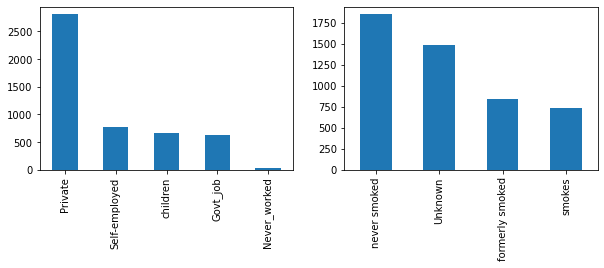

In [41]:
#Get value counts for work type and smoking status
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
stroke_data.work_type.value_counts().plot(kind='bar')
plt.subplot(1,2,2)
stroke_data.smoking_status.value_counts().plot(kind='bar')

In [42]:
#Lets one hot encode work type and smoking status

stroke_data=pd.get_dummies(data=stroke_data, columns=['work_type','smoking_status'])

In [43]:
#Lets double check 
stroke_data.info()
stroke_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4907 entries, 0 to 4908
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          4907 non-null   int64  
 1   age                             4907 non-null   float64
 2   hypertension                    4907 non-null   int64  
 3   heart_disease                   4907 non-null   int64  
 4   ever_married                    4907 non-null   int64  
 5   Residence_type                  4907 non-null   int64  
 6   avg_glucose_level               4907 non-null   float64
 7   bmi                             4907 non-null   float64
 8   stroke                          4907 non-null   int64  
 9   log_glucose                     4907 non-null   float64
 10  log_bmi                         4907 non-null   float64
 11  work_type_Govt_job              4907 non-null   uint8  
 12  work_type_Never_worked          49

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,log_glucose,log_bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,1,0,228.69,36.6,1,5.432367,3.600048,0,0,1,0,0,0,1,0,0
1,0,80.0,0,1,1,1,105.92,32.5,1,4.662684,3.481240,0,0,1,0,0,0,0,1,0
2,1,49.0,0,0,1,0,171.23,34.4,1,5.143008,3.538057,0,0,1,0,0,0,0,0,1
3,1,79.0,1,0,1,1,174.12,24.0,1,5.159745,3.178054,0,0,0,1,0,0,0,1,0
4,0,81.0,0,0,1,0,186.21,29.0,1,5.226875,3.367296,0,0,1,0,0,0,1,0,0


In [44]:
#Delete log_glucose and bmi 
stroke_data.drop(['log_glucose','bmi'], axis=1, inplace=True)

<AxesSubplot:>

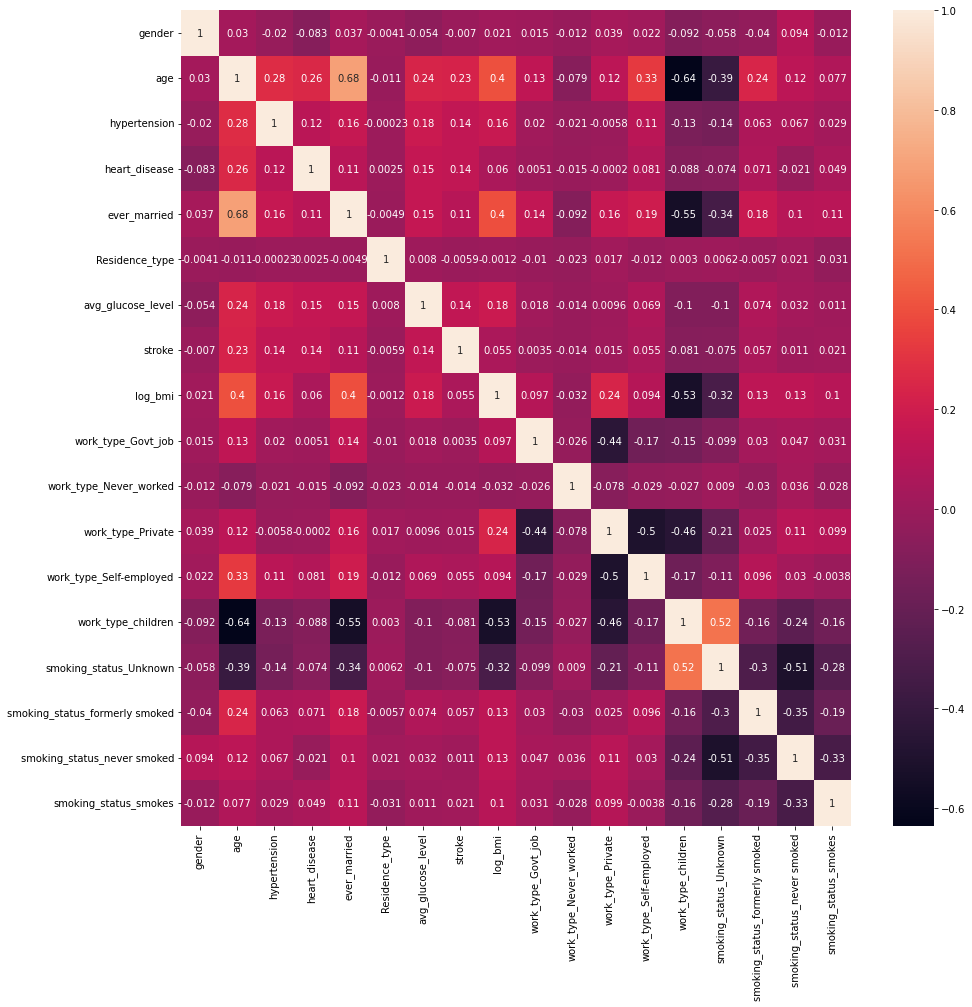

In [45]:
#All of our variables are numerical. Lets check correlations
plt.figure(figsize=(15,15))
sns.heatmap(stroke_data.corr(), annot=True)

In [46]:
#Check correlation
stroke_data.corr()['stroke'].sort_values(ascending=False)

stroke                            1.000000
age                               0.232307
hypertension                      0.143075
avg_glucose_level                 0.138879
heart_disease                     0.137921
ever_married                      0.105088
smoking_status_formerly smoked    0.057284
work_type_Self-employed           0.055321
log_bmi                           0.054754
smoking_status_smokes             0.021495
work_type_Private                 0.015011
smoking_status_never smoked       0.010748
work_type_Govt_job                0.003520
Residence_type                   -0.005946
gender                           -0.006956
work_type_Never_worked           -0.014155
smoking_status_Unknown           -0.075000
work_type_children               -0.081009
Name: stroke, dtype: float64

In [47]:
#Lets use PCA to select 0.95 percent of variance 

X=stroke_data.drop('stroke', axis=1)
y=stroke_data.stroke

In [48]:
#Scale the features
X_scaled=StandardScaler().fit_transform(X)
X_scaled

array([[-1.20053885,  1.06979076, -0.31736069, ...,  2.20513141,
        -0.77826327, -0.42040291],
       [-1.20053885,  1.64617796, -0.31736069, ..., -0.45348771,
         1.28491224, -0.42040291],
       [ 0.8329593 ,  0.27171618, -0.31736069, ..., -0.45348771,
        -0.77826327,  2.37867048],
       ...,
       [ 0.8329593 , -0.3490085 , -0.31736069, ..., -0.45348771,
         1.28491224, -0.42040291],
       [-1.20053885,  0.36039113, -0.31736069, ...,  2.20513141,
        -0.77826327, -0.42040291],
       [ 0.8329593 ,  0.05002879, -0.31736069, ..., -0.45348771,
        -0.77826327, -0.42040291]])

In [49]:
#Now apply the PCA to reduce number of dimension
pca=PCA(n_components=0.95)
X_pca=pca.fit_transform(X_scaled)

In [50]:
X_pca

array([[-2.66906766,  1.21786071, -2.79322449, ..., -0.43097899,
        -1.57463419,  0.71736653],
       [-2.24931288, -0.22931063, -0.212635  , ...,  0.13679012,
         0.60059663,  0.49383126],
       [-1.39411667, -0.93758446, -1.49021086, ..., -0.10754397,
        -1.4917778 , -0.23679858],
       ...,
       [-0.73279856,  0.87328912,  2.12962976, ...,  0.06926781,
        -0.30429434,  0.45717832],
       [-1.07686872,  0.06398979, -1.78913865, ..., -0.28674982,
        -1.05769537, -1.01720373],
       [ 0.56778409,  1.32712419,  0.63513479, ...,  1.33658131,
         0.63947254, -0.31538631]])

X_pca will be used to train the model in the future.

In [51]:
#Chekcing how many n_components I need to retain 95% variance
pca_dim=PCA()
pca_dim.fit(X_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >=0.95)
d

12

I need 12 n_components to retain 95% of variance.

### Project Report - Exploratory Data Analysis
Summary:

    The dataset contains information on individuals who were prone to a stroke. The possible variables that have the potential  of increasing the risks of getting a stroke include:
    gender: "Male", "Female" or "Other"
    age: age of the patient
    hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
    heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
    ever_married: "No" or "Yes"
    work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
    Residence_type: "Rural" or "Urban"
    avg_glucose_level: average glucose level in blood
    bmi: body mass index
    smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
    stroke: 1 if the patient had a stroke or 0 if not

	Note: The data contains a column ‘id’, a unique identifier for individuals.
	Source of the data: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

Initial Plan for Data Exploration:

    Understanding the variable relationships in the data by applying visualization techniques, statistical analysis, and hypothesis testing. 
    Plan first began by understanding the population differences of individuals who were subject to a stroke. 
    Then, understand the distributions of numerical variables using histograms and apply necessary transformations to normalize the data. 
    Next, a countplot was applied to visualize the categorical variables grouped by the target variable ‘stroke’ to understand their relationships. 
    After, three hypothesis tests were conducted to understand the significance of two groups in relation to stroke variables using a t-test for numerical and a chi-square test for categorical variables. 

Actions taken for Data Cleaning and Feature Engineering:

    Analyze the data frame for missing values and outliers using python methods and boxplots.
    Remove missing values and outliers, and remove unnecessary variables like “id”
    Transform categorical variables into numerical by applying bivariate encoding and one-hot encoding.
    Analyze the correlations between each variable with the target variable using heatmaps.
    Apply PCA to choose the number of features that have more correlation with the target.

Key Findings:

    The data is imbalanced with individuals with a stroke only accounting for 4.25%
    Individuals 40 and older are likely to get a stroke
    Higher glucose level increases the risk of stroke
    The most correlated variable with the target is age
    12 features are needed to keep 95% of the variance or information of the data

Formulating Three Hypothesis and Results:
    
    First Hypothesis:
- Null: There is no significant difference between the glucose level of people having a stroke and not.
- Alternative: People with higher glucose levels are likely to have a stroke.

- Result: Using the t-test, the p-value is less than 0.05. The null hypothesis is rejected, so, people with higher glucose levels are likely to have a stroke. 

    Second Hypothesis:
- Null: There is no significant difference between which gender is more likely to have a stroke.
- Alternative: There is a significant difference between which gender is more likely to have a stroke.

- Result: Using the chi-squared test, the p-value of 0.86 indicates there is no significant difference between which gender will have a stroke. The null hypothesis is retained.

    Third Hypothesis:
- Null: Heart disease does not contribute to stroke.
- Alternative: Heart attack does contribute to a stroke.

- Result: Using the chi-squared test, the p-value is less than 0.05, indicating that heart disease does contribute to stroke.

Suggestions for the next steps in analyzing this data:

    Apply statistical tests to understand the significance of the relationship of each class in the categorical variables to the target variable. 

A paragraph that summarizes the quality of this data set and a request for additional data if needed:

    The data contains a good number of features to use in prediction algorithms. However, the data is not balanced where the population of individuals with a stroke only accounts for 4.25% of the data. More data on individuals who got a stroke needs to be collected. Furthermore, additional variables that might potentially have a high correlation with the target variable are recommended. 
